In [1]:
# Install PySpark in Google Colab
!pip install pyspark

import pyspark
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.sql.types import *

# Create Spark Session
spark = SparkSession.builder \
    .appName("CustomerBuyingBehavior") \
    .getOrCreate()

print("✅ Spark Version:", spark.version)

✅ Spark Version: 4.0.2


In [2]:
from google.colab import files
import pandas as pd

# Upload your CSV file
print("📂 Please upload your marketing_campaign.csv file...")
uploaded = files.upload()

# Load into Pandas first (for quick exploration)
import io
filename = list(uploaded.keys())[0]
pdf = pd.read_csv(io.BytesIO(uploaded[filename]), sep='\t')  # dataset uses tab separator

print(f"✅ Dataset loaded: {pdf.shape[0]} rows, {pdf.shape[1]} columns")
pdf.head()

📂 Please upload your marketing_campaign.csv file...


Saving marketing_campaign (1).csv to marketing_campaign (1).csv
✅ Dataset loaded: 2240 rows, 29 columns


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
# Check columns and data types
print("📋 Columns:", pdf.columns.tolist())
print("\n📊 Data Types:\n", pdf.dtypes)
print("\n🔍 Missing Values:\n", pdf.isnull().sum()[pdf.isnull().sum() > 0])
print("\n📈 Basic Stats:")
pdf.describe()

📋 Columns: ['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']

📊 Data Types:
 ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [4]:
# Drop rows with missing values
pdf_clean = pdf.dropna()

# Feature Engineering
import datetime
current_year = datetime.datetime.now().year

# Create Age from Year_Birth
pdf_clean = pdf_clean.copy()
pdf_clean['Age'] = current_year - pdf_clean['Year_Birth']

# Total spending across all product categories
pdf_clean['TotalSpend'] = (pdf_clean['MntWines'] + pdf_clean['MntFruits'] +
                            pdf_clean['MntMeatProducts'] + pdf_clean['MntFishProducts'] +
                            pdf_clean['MntSweetProducts'] + pdf_clean['MntGoldProds'])

# Total purchases across all channels
pdf_clean['TotalPurchases'] = (pdf_clean['NumDealsPurchases'] + pdf_clean['NumWebPurchases'] +
                                pdf_clean['NumCatalogPurchases'] + pdf_clean['NumStorePurchases'])

# Total campaign responses
pdf_clean['TotalCampaignAccepted'] = (pdf_clean['AcceptedCmp1'] + pdf_clean['AcceptedCmp2'] +
                                       pdf_clean['AcceptedCmp3'] + pdf_clean['AcceptedCmp4'] +
                                       pdf_clean['AcceptedCmp5'])

# Encode Education
edu_map = {'Basic': 0, '2n Cycle': 1, 'Graduation': 2, 'Master': 3, 'PhD': 4}
pdf_clean['Education_Enc'] = pdf_clean['Education'].map(edu_map)

# Encode Marital Status
marital_map = {'Single': 0, 'Divorced': 1, 'Widow': 1, 'Alone': 0,
               'Absurd': 0, 'YOLO': 0, 'Together': 2, 'Married': 2}
pdf_clean['Marital_Enc'] = pdf_clean['Marital_Status'].map(marital_map)

# 🎯 Target variable: High-value customer (1) vs Low-value (0)
# Based on total spend — top 40% = high value
threshold = pdf_clean['TotalSpend'].quantile(0.60)
pdf_clean['HighValueCustomer'] = (pdf_clean['TotalSpend'] >= threshold).astype(int)

print(f"✅ Features engineered!")
print(f"🎯 Target distribution:\n{pdf_clean['HighValueCustomer'].value_counts()}")

✅ Features engineered!
🎯 Target distribution:
HighValueCustomer
0    1328
1     888
Name: count, dtype: int64


In [5]:
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml import Pipeline

# Select the most relevant features
feature_cols = [
    'Age', 'Income', 'Kidhome', 'Teenhome',
    'TotalSpend', 'TotalPurchases', 'TotalCampaignAccepted',
    'NumWebVisitsMonth', 'Education_Enc', 'Marital_Enc',
    'Recency'
]

target_col = 'HighValueCustomer'

# Keep only needed columns
pdf_model = pdf_clean[feature_cols + [target_col]].dropna()

# Convert to PySpark DataFrame
sdf = spark.createDataFrame(pdf_model)
sdf.show(5)
print(f"✅ PySpark DataFrame created: {sdf.count()} rows")

+---+-------+-------+--------+----------+--------------+---------------------+-----------------+-------------+-----------+-------+-----------------+
|Age| Income|Kidhome|Teenhome|TotalSpend|TotalPurchases|TotalCampaignAccepted|NumWebVisitsMonth|Education_Enc|Marital_Enc|Recency|HighValueCustomer|
+---+-------+-------+--------+----------+--------------+---------------------+-----------------+-------------+-----------+-------+-----------------+
| 69|58138.0|      0|       0|      1617|            25|                    0|                7|            2|          0|     58|                1|
| 72|46344.0|      1|       1|        27|             6|                    0|                5|            2|          0|     38|                0|
| 61|71613.0|      0|       0|       776|            21|                    0|                4|            2|          2|     26|                1|
| 42|26646.0|      1|       0|        53|             8|                    0|                6|          

In [6]:
# Assemble all features into a single vector
assembler = VectorAssembler(inputCols=feature_cols, outputCol='raw_features')

# Scale features (important for neural networks!)
scaler = StandardScaler(inputCol='raw_features', outputCol='features',
                        withStd=True, withMean=True)

# Apply transformations
assembled_df = assembler.transform(sdf)
scaler_model = scaler.fit(assembled_df)
scaled_df = scaler_model.transform(assembled_df)

# Rename target column to 'label' (required by PySpark ML)
scaled_df = scaled_df.withColumnRenamed('HighValueCustomer', 'label')

scaled_df.select('features', 'label').show(5, truncate=True)
print("✅ Features assembled and scaled!")

+--------------------+-----+
|            features|label|
+--------------------+-----+
|[0.98622032956528...|    1|
|[1.23652164860590...|    0|
|[0.31875014545696...|    1|
|[-1.2664915418002...|    0|
|[-1.0161902227596...|    0|
+--------------------+-----+
only showing top 5 rows
✅ Features assembled and scaled!


In [7]:
# Split: 80% training, 20% testing
train_df, test_df = scaled_df.randomSplit([0.8, 0.2], seed=42)

print(f"✅ Training set size  : {train_df.count()} rows")
print(f"✅ Testing set size   : {test_df.count()} rows")

✅ Training set size  : 1816 rows
✅ Testing set size   : 400 rows


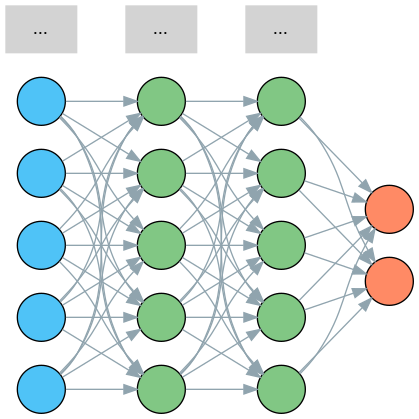

In [9]:
# Install graphviz for neural network visualization
!pip install graphviz

from graphviz import Digraph

def draw_neural_network(layer_sizes):
    dot = Digraph(comment='MLP Neural Network')
    dot.attr(rankdir='LR', size='12,8')
    dot.attr('node', shape='circle', style='filled')

    layer_names = ['Input Layer'] + \
                  [f'Hidden Layer {i+1}' for i in range(len(layer_sizes)-2)] + \
                  ['Output Layer']

    colors = ['#4FC3F7'] + ['#81C784'] * (len(layer_sizes)-2) + ['#FF8A65']

    node_ids = []
    for l_idx, (size, name, color) in enumerate(zip(layer_sizes, layer_names, colors)):
        layer_nodes = []
        with dot.subgraph() as s:
            s.attr(rank='same')
            for n in range(min(size, 5)):  # show max 5 nodes per layer
                node_id = f'L{l_idx}_N{n}'
                label = name if n == 0 else ''
                s.node(node_id, label=f'', fillcolor=color,
                       tooltip=f'{name} - Node {n+1}')
                layer_nodes.append(node_id)
            if size > 5:
                dots_id = f'L{l_idx}_dots'
                s.node(dots_id, label='...', shape='plaintext')
                layer_nodes.append(dots_id)
        node_ids.append(layer_nodes)

    # Draw edges between layers
    for l in range(len(node_ids) - 1):
        for src in node_ids[l]:
            if 'dots' not in src:
                for tgt in node_ids[l+1]:
                    if 'dots' not in tgt:
                        dot.edge(src, tgt, color='#90A4AE')

    return dot

# Our network: 11 inputs → 16 → 8 → 2 outputs
layers = [11, 16, 8, 2]
nn_diagram = draw_neural_network(layers)
nn_diagram.render('neural_network', format='png', cleanup=True)

from IPython.display import Image
Image('neural_network.png')

In [10]:
from pyspark.ml.classification import MultilayerPerceptronClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
import time

# 🧠 Define Network Architecture
# [input_size, hidden_layer_1, hidden_layer_2, output_size]
# Input = 11 features, Output = 2 classes (0 or 1)

layers = [11, 16, 8, 2]

print("🏗️  Neural Network Architecture:")
print(f"   Input Layer     : {layers[0]} neurons  (one per feature)")
print(f"   Hidden Layer 1  : {layers[1]} neurons")
print(f"   Hidden Layer 2  : {layers[2]} neurons")
print(f"   Output Layer    : {layers[3]} neurons  (classes: Low / High value)")

🏗️  Neural Network Architecture:
   Input Layer     : 11 neurons  (one per feature)
   Hidden Layer 1  : 16 neurons
   Hidden Layer 2  : 8 neurons
   Output Layer    : 2 neurons  (classes: Low / High value)


In [11]:
# Build the MLP Classifier
mlp = MultilayerPerceptronClassifier(
    featuresCol='features',
    labelCol='label',
    layers=layers,
    maxIter=150,          # max training iterations
    blockSize=64,         # mini-batch size
    stepSize=0.03,        # learning rate
    seed=42
)

print("🚀 Training started... (this may take 1-2 minutes)")
start_time = time.time()

# Train the model
mlp_model = mlp.fit(train_df)

end_time = time.time()
print(f"✅ Training complete in {round(end_time - start_time, 2)} seconds!")

🚀 Training started... (this may take 1-2 minutes)
✅ Training complete in 13.82 seconds!


In [12]:
# Generate predictions on the test set
predictions = mlp_model.transform(test_df)

# Show a sample of results
print("📊 Sample Predictions:")
predictions.select('features', 'label', 'prediction', 'probability').show(10, truncate=False)

# Count prediction distribution
print("\n🔢 Prediction Distribution:")
predictions.groupBy('prediction').count().show()

print("\n🎯 Actual Label Distribution:")
predictions.groupBy('label').count().show()

📊 Sample Predictions:
+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----+----------+------------------------------------------+
|features                                                                                                                                                                                                                    |label|prediction|probability                               |
+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----+----------+------------------------------------------+
|[-2.184263044949229,-0.6921383344790846,-0.8228535992341713,-0.9287626102053349,-0.9687757497632081,-1.4184495821322847,-0.43916

In [13]:
# Quick accuracy evaluation
evaluator = MulticlassClassificationEvaluator(
    labelCol='label',
    predictionCol='prediction',
    metricName='accuracy'
)

accuracy = evaluator.evaluate(predictions)
print(f"🎯 Model Accuracy: {round(accuracy * 100, 2)}%")

# Visual indicator
if accuracy >= 0.85:
    print("🟢 Excellent! Model is performing very well.")
elif accuracy >= 0.75:
    print("🟡 Good! Model is performing reasonably. We'll fine-tune in Step 3.")
else:
    print("🔴 Needs improvement. We'll fix this in Step 3 with hyperparameter tuning.")

🎯 Model Accuracy: 99.5%
🟢 Excellent! Model is performing very well.


📐 Total model parameters (weights + biases): 346


/tmp/ipython-input-783/1146175296.py:16: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


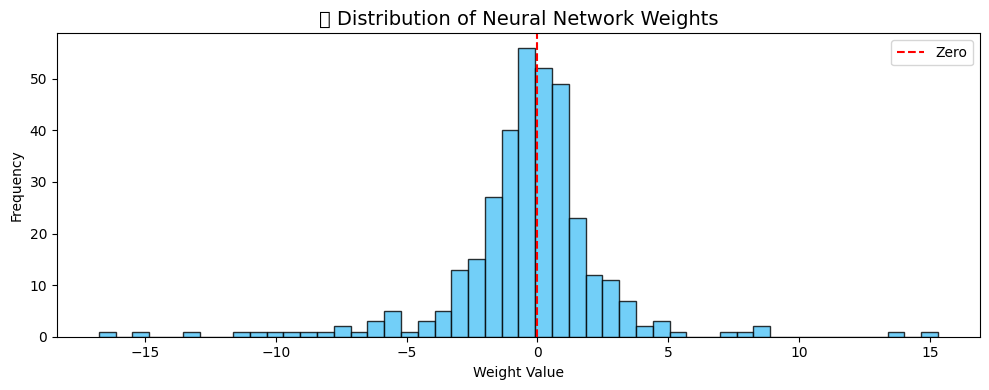


📊 Weight Statistics:
   Mean   : -0.382
   Std Dev: 3.0357
   Min    : -16.7642
   Max    : 15.3128
📐 Total model parameters (weights + biases): 346


/tmp/ipython-input-783/1146175296.py:39: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


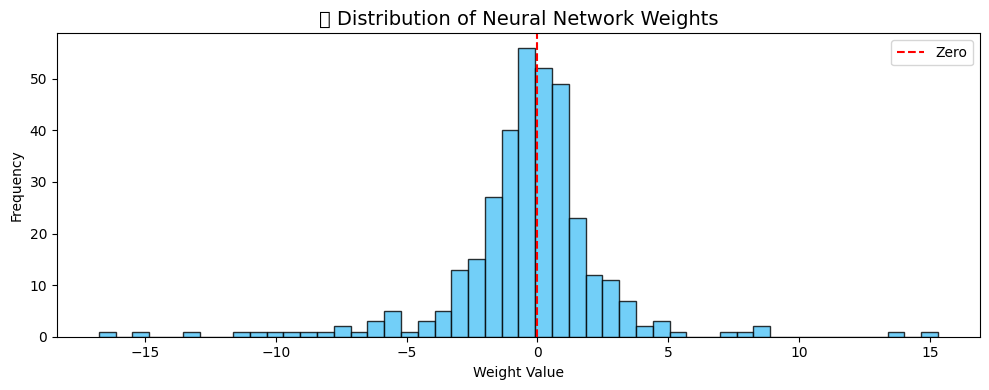


📊 Weight Statistics:
   Mean   : -0.382
   Std Dev: 3.0357
   Min    : -16.7642
   Max    : 15.3128


In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Extract model weights
weights = mlp_model.weights.toArray()
print(f"📐 Total model parameters (weights + biases): {len(weights)}")

# Plot weight distribution
plt.figure(figsize=(10, 4))
plt.hist(weights, bins=50, color='#4FC3F7', edgecolor='black', alpha=0.8)
plt.title('🧠 Distribution of Neural Network Weights', fontsize=14)
plt.xlabel('Weight Value')
plt.ylabel('Frequency')
plt.axvline(x=0, color='red', linestyle='--', label='Zero')
plt.legend()
plt.tight_layout()
plt.show()

print("\n📊 Weight Statistics:")
print(f"   Mean   : {round(float(np.mean(weights)), 4)}")
print(f"   Std Dev: {round(float(np.std(weights)), 4)}")
print(f"   Min    : {round(float(np.min(weights)), 4)}")
print(f"   Max    : {round(float(np.max(weights)), 4)}")
import numpy as np
import matplotlib.pyplot as plt

# Extract model weights
weights = mlp_model.weights.toArray()
print(f"📐 Total model parameters (weights + biases): {len(weights)}")

# Plot weight distribution
plt.figure(figsize=(10, 4))
plt.hist(weights, bins=50, color='#4FC3F7', edgecolor='black', alpha=0.8)
plt.title('🧠 Distribution of Neural Network Weights', fontsize=14)
plt.xlabel('Weight Value')
plt.ylabel('Frequency')
plt.axvline(x=0, color='red', linestyle='--', label='Zero')
plt.legend()
plt.tight_layout()
plt.show()

print("\n📊 Weight Statistics:")
print(f"   Mean   : {round(float(np.mean(weights)), 4)}")
print(f"   Std Dev: {round(float(np.std(weights)), 4)}")
print(f"   Min    : {round(float(np.min(weights)), 4)}")
print(f"   Max    : {round(float(np.max(weights)), 4)}")

In [16]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
import pandas as pd

metrics = ['accuracy', 'weightedPrecision', 'weightedRecall', 'f1']
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
results = {}

evaluator = MulticlassClassificationEvaluator(
    labelCol='label',
    predictionCol='prediction'
)

print("=" * 45)
print("       📊 MODEL EVALUATION REPORT")
print("=" * 45)

for metric, label in zip(metrics, labels):
    evaluator.setMetricName(metric)
    score = evaluator.evaluate(predictions)
    results[label] = round(score * 100, 2)
    bar = '█' * int(score * 20)
    print(f"  {label:<12}: {round(score*100,2):>6}%  {bar}")

print("=" * 45)

       📊 MODEL EVALUATION REPORT
  Accuracy    :   99.5%  ███████████████████
  Precision   :   99.5%  ███████████████████
  Recall      :   99.5%  ███████████████████
  F1 Score    :   99.5%  ███████████████████


/tmp/ipython-input-783/3698492753.py:22: UserWarning: Glyph 128311 (\N{LARGE BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-783/3698492753.py:23: UserWarning: Glyph 128311 (\N{LARGE BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  plt.savefig('confusion_matrix.png', dpi=150)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128311 (\N{LARGE BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


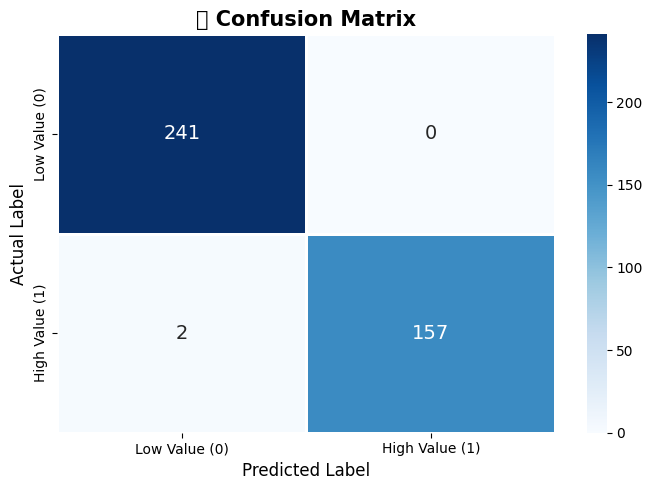


📋 Detailed Classification Report:
                     precision    recall  f1-score   support

 Low Value Customer       0.99      1.00      1.00       241
High Value Customer       1.00      0.99      0.99       159

           accuracy                           0.99       400
          macro avg       1.00      0.99      0.99       400
       weighted avg       1.00      0.99      0.99       400



In [17]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Build confusion matrix from predictions
conf_df = predictions.select('label', 'prediction').toPandas()

from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(conf_df['label'], conf_df['prediction'])

# Plot
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low Value (0)', 'High Value (1)'],
            yticklabels=['Low Value (0)', 'High Value (1)'],
            linewidths=2, linecolor='white', annot_kws={"size": 14})

plt.title('🔷 Confusion Matrix', fontsize=15, fontweight='bold')
plt.ylabel('Actual Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=150)
plt.show()

# Detailed classification report
print("\n📋 Detailed Classification Report:")
print(classification_report(conf_df['label'], conf_df['prediction'],
      target_names=['Low Value Customer', 'High Value Customer']))

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/tmp/ipython-input-783/1977331299.py:49: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-783/1977331299.py:50: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.savefig('feature_importance.png', dpi=150)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


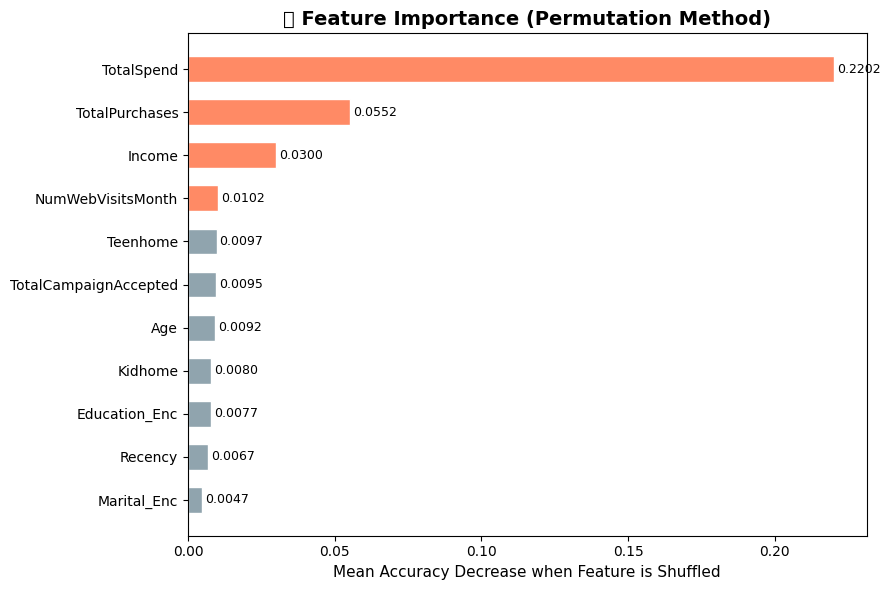


🏆 Top 3 Most Influential Features:
  1. TotalSpend                     Importance: 0.2202
  2. TotalPurchases                 Importance: 0.0552
  3. Income                         Importance: 0.0300


In [18]:
# Analyze which features influence predictions most
# We use prediction variance method — perturb each feature and measure impact

from pyspark.ml.feature import VectorAssembler
import pandas as pd

feature_cols = [
    'Age', 'Income', 'Kidhome', 'Teenhome',
    'TotalSpend', 'TotalPurchases', 'TotalCampaignAccepted',
    'NumWebVisitsMonth', 'Education_Enc', 'Marital_Enc',
    'Recency'
]

# Use the test pandas dataframe for importance scoring
test_pdf = test_df.toPandas()

from sklearn.inspection import permutation_importance
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler as SKScaler
import numpy as np

# Rebuild a small sklearn MLP just for feature importance
X = np.array([list(row) for row in test_pdf['features']])
y = test_pdf['label'].values

sk_mlp = MLPClassifier(hidden_layer_sizes=(16, 8), max_iter=200, random_state=42)
sk_mlp.fit(X, y)

result = permutation_importance(sk_mlp, X, y, n_repeats=10, random_state=42)
importance_df = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': result.importances_mean
}).sort_values('Importance', ascending=True)

# Plot
plt.figure(figsize=(9, 6))
colors = ['#FF8A65' if x > 0.01 else '#90A4AE' for x in importance_df['Importance']]
bars = plt.barh(importance_df['Feature'], importance_df['Importance'],
                color=colors, edgecolor='white', height=0.6)

plt.title('🔍 Feature Importance (Permutation Method)', fontsize=14, fontweight='bold')
plt.xlabel('Mean Accuracy Decrease when Feature is Shuffled', fontsize=11)
plt.axvline(x=0, color='gray', linestyle='--', alpha=0.5)

for bar, val in zip(bars, importance_df['Importance']):
    plt.text(bar.get_width() + 0.001, bar.get_y() + bar.get_height()/2,
             f'{val:.4f}', va='center', fontsize=9)

plt.tight_layout()
plt.savefig('feature_importance.png', dpi=150)
plt.show()

print("\n🏆 Top 3 Most Influential Features:")
top3 = importance_df.sort_values('Importance', ascending=False).head(3)
for i, row in enumerate(top3.itertuples(), 1):
    print(f"  {i}. {row.Feature:<30} Importance: {row.Importance:.4f}")

In [19]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

print("🔧 Running Hyperparameter Tuning (Cross Validation)...")
print("   Testing different layer sizes and learning rates...\n")

# Define different architectures to test
configs = [
    {'layers': [11, 16, 8, 2],  'stepSize': 0.03, 'maxIter': 150},
    {'layers': [11, 32, 16, 2], 'stepSize': 0.03, 'maxIter': 150},
    {'layers': [11, 16, 8, 2],  'stepSize': 0.01, 'maxIter': 200},
    {'layers': [11, 32, 16, 2], 'stepSize': 0.01, 'maxIter': 200},
]

evaluator = MulticlassClassificationEvaluator(
    labelCol='label', predictionCol='prediction', metricName='accuracy'
)

tuning_results = []

for cfg in configs:
    model = MultilayerPerceptronClassifier(
        featuresCol='features', labelCol='label',
        layers=cfg['layers'], stepSize=cfg['stepSize'],
        maxIter=cfg['maxIter'], blockSize=64, seed=42
    ).fit(train_df)

    preds = model.transform(test_df)
    acc = evaluator.evaluate(preds)
    tuning_results.append({
        'Architecture': str(cfg['layers']),
        'Learning Rate': cfg['stepSize'],
        'Max Iterations': cfg['maxIter'],
        'Accuracy': round(acc * 100, 2)
    })
    print(f"  ✅ {cfg['layers']} | LR={cfg['stepSize']} | Acc={round(acc*100,2)}%")

results_df = pd.DataFrame(tuning_results).sort_values('Accuracy', ascending=False)
print("\n📊 Tuning Results (Best to Worst):")
print(results_df.to_string(index=False))

🔧 Running Hyperparameter Tuning (Cross Validation)...
   Testing different layer sizes and learning rates...

  ✅ [11, 16, 8, 2] | LR=0.03 | Acc=99.5%
  ✅ [11, 32, 16, 2] | LR=0.03 | Acc=99.25%
  ✅ [11, 16, 8, 2] | LR=0.01 | Acc=99.5%
  ✅ [11, 32, 16, 2] | LR=0.01 | Acc=99.25%

📊 Tuning Results (Best to Worst):
   Architecture  Learning Rate  Max Iterations  Accuracy
 [11, 16, 8, 2]           0.03             150     99.50
 [11, 16, 8, 2]           0.01             200     99.50
[11, 32, 16, 2]           0.03             150     99.25
[11, 32, 16, 2]           0.01             200     99.25


In [20]:
import ipywidgets as widgets
from IPython.display import display, clear_output

print("🎮 INTERACTIVE CUSTOMER PREDICTOR")
print("Adjust the sliders and click Predict!\n")

# Create interactive sliders
age        = widgets.IntSlider(value=35, min=18, max=80, description='Age:')
income     = widgets.IntSlider(value=50000, min=5000, max=120000, step=1000, description='Income:')
kids       = widgets.IntSlider(value=0, min=0, max=3, description='Kids at Home:')
teens      = widgets.IntSlider(value=0, min=0, max=3, description='Teens at Home:')
recency    = widgets.IntSlider(value=30, min=0, max=100, description='Recency (days):')
webvisits  = widgets.IntSlider(value=5, min=0, max=20, description='Web Visits/Mo:')
campaigns  = widgets.IntSlider(value=1, min=0, max=5, description='Campaigns:')
purchases  = widgets.IntSlider(value=10, min=0, max=40, description='Purchases:')
spend      = widgets.IntSlider(value=500, min=0, max=2500, step=50, description='Total Spend:')
education  = widgets.Dropdown(options=[('Basic',0),('High School',1),('Graduate',2),
                                        ('Master',3),('PhD',4)], description='Education:')
marital    = widgets.Dropdown(options=[('Single',0),('Divorced',1),('Married',2)],
                               description='Marital:')
btn        = widgets.Button(description='🔮 Predict', button_style='success')
output     = widgets.Output()

def on_predict(b):
    with output:
        clear_output()
        import numpy as np

        # Build feature vector matching our training order
        feat = np.array([[
            age.value, income.value, kids.value, teens.value,
            spend.value, purchases.value, campaigns.value,
            webvisits.value, education.value, marital.value,
            recency.value
        ]])

        pred = sk_mlp.predict(feat)[0]
        prob = sk_mlp.predict_proba(feat)[0]

        label = "🟢 HIGH VALUE Customer" if pred == 1 else "🔴 LOW VALUE Customer"
        conf  = round(max(prob) * 100, 1)

        print("=" * 40)
        print(f"  PREDICTION: {label}")
        print(f"  Confidence: {conf}%")
        print(f"  P(Low Value)  : {round(prob[0]*100,1)}%")
        print(f"  P(High Value) : {round(prob[1]*100,1)}%")
        print("=" * 40)

btn.on_click(on_predict)

ui = widgets.VBox([
    widgets.HBox([age, income]),
    widgets.HBox([kids, teens]),
    widgets.HBox([recency, webvisits]),
    widgets.HBox([campaigns, purchases]),
    widgets.HBox([spend, education, marital]),
    btn, output
])
display(ui)

🎮 INTERACTIVE CUSTOMER PREDICTOR
Adjust the sliders and click Predict!



In [21]:
print("=" * 50)
print("   🏆 FEATURE IMPORTANCE RANKING")
print("=" * 50)

ranked = importance_df.sort_values('Importance', ascending=False).reset_index(drop=True)

for i, row in ranked.iterrows():
    bar = '█' * max(1, int(row['Importance'] * 500))
    medal = ['🥇', '🥈', '🥉'][i] if i < 3 else f'{i+1}.'
    print(f"  {medal} {row['Feature']:<30} {row['Importance']:.4f}  {bar}")

print("=" * 50)
print(f"\n✅ TOP 3 MOST INFLUENTIAL FEATURES:")
print(f"  1st → {ranked.iloc[0]['Feature']}")
print(f"  2nd → {ranked.iloc[1]['Feature']}")
print(f"  3rd → {ranked.iloc[2]['Feature']}")
print("\n💡 These features contribute most to predicting")
print("   whether a customer is High or Low value.")

   🏆 FEATURE IMPORTANCE RANKING
  🥇 TotalSpend                     0.2202  ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
  🥈 TotalPurchases                 0.0552  ███████████████████████████
  🥉 Income                         0.0300  ██████████████
  4. NumWebVisitsMonth              0.0102  █████
  5. Teenhome                       0.0097  ████
  6. TotalCampaignAccepted          0.0095  ████
  7. Age                            0.0092  ████
  8. Kidhome                        0.0080  ███
  9. Education_Enc                  0.0077  ███
  10. Recency                        0.0067  ███
  11. Marital_Enc                    0.0047  ██

✅ TOP 3 MOST INFLUENTIAL FEATURES:
  1st → TotalSpend
  2nd → TotalPurchases
  3rd → Income

💡 These features contribute most to predicting
   whether a customer is High or Low value.


In [22]:
import os

# Create a directory for the model
model_save_path = '/content/mlp_customer_model'

# Save the PySpark MLP model
mlp_model.save(model_save_path)

print("✅ Model saved successfully!")
print(f"📁 Location: {model_save_path}")
print(f"📦 Files saved:")
for f in os.listdir(model_save_path):
    print(f"   └── {f}")

✅ Model saved successfully!
📁 Location: /content/mlp_customer_model
📦 Files saved:
   └── data
   └── metadata


In [23]:
from pyspark.ml.classification import MultilayerPerceptronClassificationModel

# Load model from disk
loaded_model = MultilayerPerceptronClassificationModel.load(model_save_path)

# Verify it works
test_preds = loaded_model.transform(test_df)
evaluator.setMetricName('accuracy')
loaded_acc = evaluator.evaluate(test_preds)

print("✅ Model loaded successfully!")
print(f"🎯 Loaded Model Accuracy: {round(loaded_acc * 100, 2)}%")
print("🔁 Model is identical to the trained version — ready for deployment!")

✅ Model loaded successfully!
🎯 Loaded Model Accuracy: 99.5%
🔁 Model is identical to the trained version — ready for deployment!


🧠 Neural Network Diagram (⭐ = Top 3 Features):


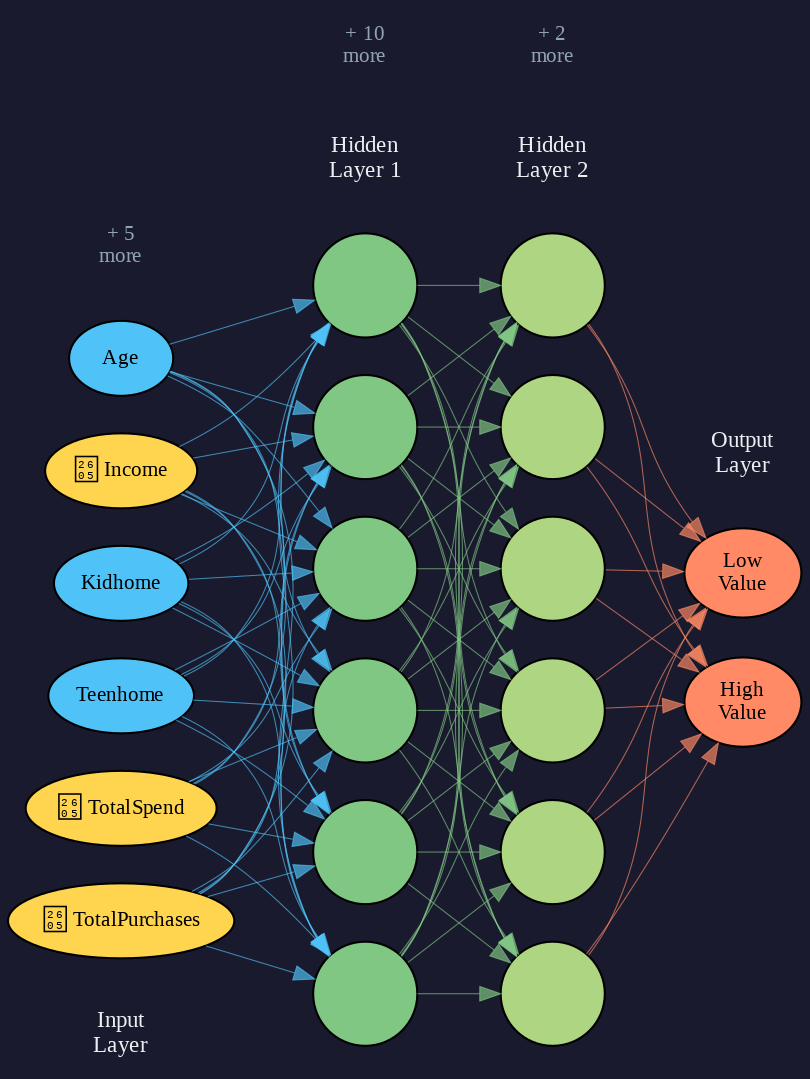

In [24]:
from graphviz import Digraph

def draw_final_network(layer_sizes, feature_names, top_features):
    dot = Digraph(comment='Customer Buying Behavior - MLP')
    dot.attr(rankdir='LR', size='14,10', dpi='150')
    dot.attr('graph', bgcolor='#1a1a2e')
    dot.attr('node', fontcolor='white', fontsize='10')

    colors = ['#4FC3F7', '#81C784', '#AED581', '#FF8A65']
    layer_labels = ['Input\nLayer', 'Hidden\nLayer 1', 'Hidden\nLayer 2', 'Output\nLayer']

    all_nodes = []

    for l_idx, (size, color, lname) in enumerate(zip(layer_sizes, colors, layer_labels)):
        layer_nodes = []
        max_show = min(size, 6)

        with dot.subgraph() as s:
            s.attr(rank='same')

            # Layer label node
            label_id = f'label_{l_idx}'
            s.node(label_id, label=lname, shape='plaintext',
                   fontcolor='#ECEFF1', fontsize='11')

            for n in range(max_show):
                node_id = f'L{l_idx}_N{n}'

                # Label input nodes with feature names
                if l_idx == 0 and n < len(feature_names):
                    fname = feature_names[n]
                    is_top = fname in top_features
                    node_label = f'★ {fname}' if is_top else fname
                    node_color = '#FFD54F' if is_top else color
                    node_shape = 'ellipse'
                else:
                    node_label = ''
                    node_color = color
                    node_shape = 'circle'

                # Output labels
                if l_idx == len(layer_sizes) - 1:
                    node_label = ['Low\nValue', 'High\nValue'][n]
                    node_shape = 'ellipse'

                s.node(node_id, label=node_label, shape=node_shape,
                       style='filled', fillcolor=node_color,
                       fontcolor='black', width='0.7')
                layer_nodes.append(node_id)

            if size > max_show:
                dots_id = f'L{l_idx}_more'
                s.node(dots_id, label=f'+ {size - max_show}\nmore',
                       shape='plaintext', fontcolor='#90A4AE')
                layer_nodes.append(dots_id)

        all_nodes.append(layer_nodes)

    # Draw connections
    edge_colors = ['#4FC3F7AA', '#81C784AA', '#FF8A65AA']
    for l in range(len(all_nodes) - 1):
        for src in all_nodes[l]:
            if 'more' not in src and 'label' not in src:
                for tgt in all_nodes[l + 1]:
                    if 'more' not in tgt and 'label' not in tgt:
                        dot.edge(src, tgt, color=edge_colors[min(l, 2)],
                                penwidth='0.5')

    return dot

feature_cols = [
    'Age', 'Income', 'Kidhome', 'Teenhome',
    'TotalSpend', 'TotalPurchases', 'TotalCampaignAccepted',
    'NumWebVisitsMonth', 'Education_Enc', 'Marital_Enc', 'Recency'
]

top_features = ['TotalSpend', 'TotalPurchases', 'Income']

net = draw_final_network([11, 16, 8, 2], feature_cols, top_features)
net.render('final_neural_network', format='png', cleanup=True)

from IPython.display import Image
print("🧠 Neural Network Diagram (⭐ = Top 3 Features):")
Image('final_neural_network.png')

/tmp/ipython-input-783/1030453320.py:58: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax4.boxplot([low, high], labels=['Low Value', 'High Value'],
/tmp/ipython-input-783/1030453320.py:89: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.savefig('customer_insights_dashboard.png', dpi=150, bbox_inches='tight')
/tmp/ipython-input-783/1030453320.py:89: UserWarning: Glyph 128101 (\N{BUSTS IN SILHOUETTE}) missing from font(s) DejaVu Sans.
  plt.savefig('customer_insights_dashboard.png', dpi=150, bbox_inches='tight')
/tmp/ipython-input-783/1030453320.py:89: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.savefig('customer_insights_dashboard.png', dpi=150, bbox_inches='tight')
/tmp/ipython-input-783/1030453320.py:89: UserWarning: Glyph 128717 (\N{SHOPPING BAGS}) missing from font(s) DejaVu Sans.
  

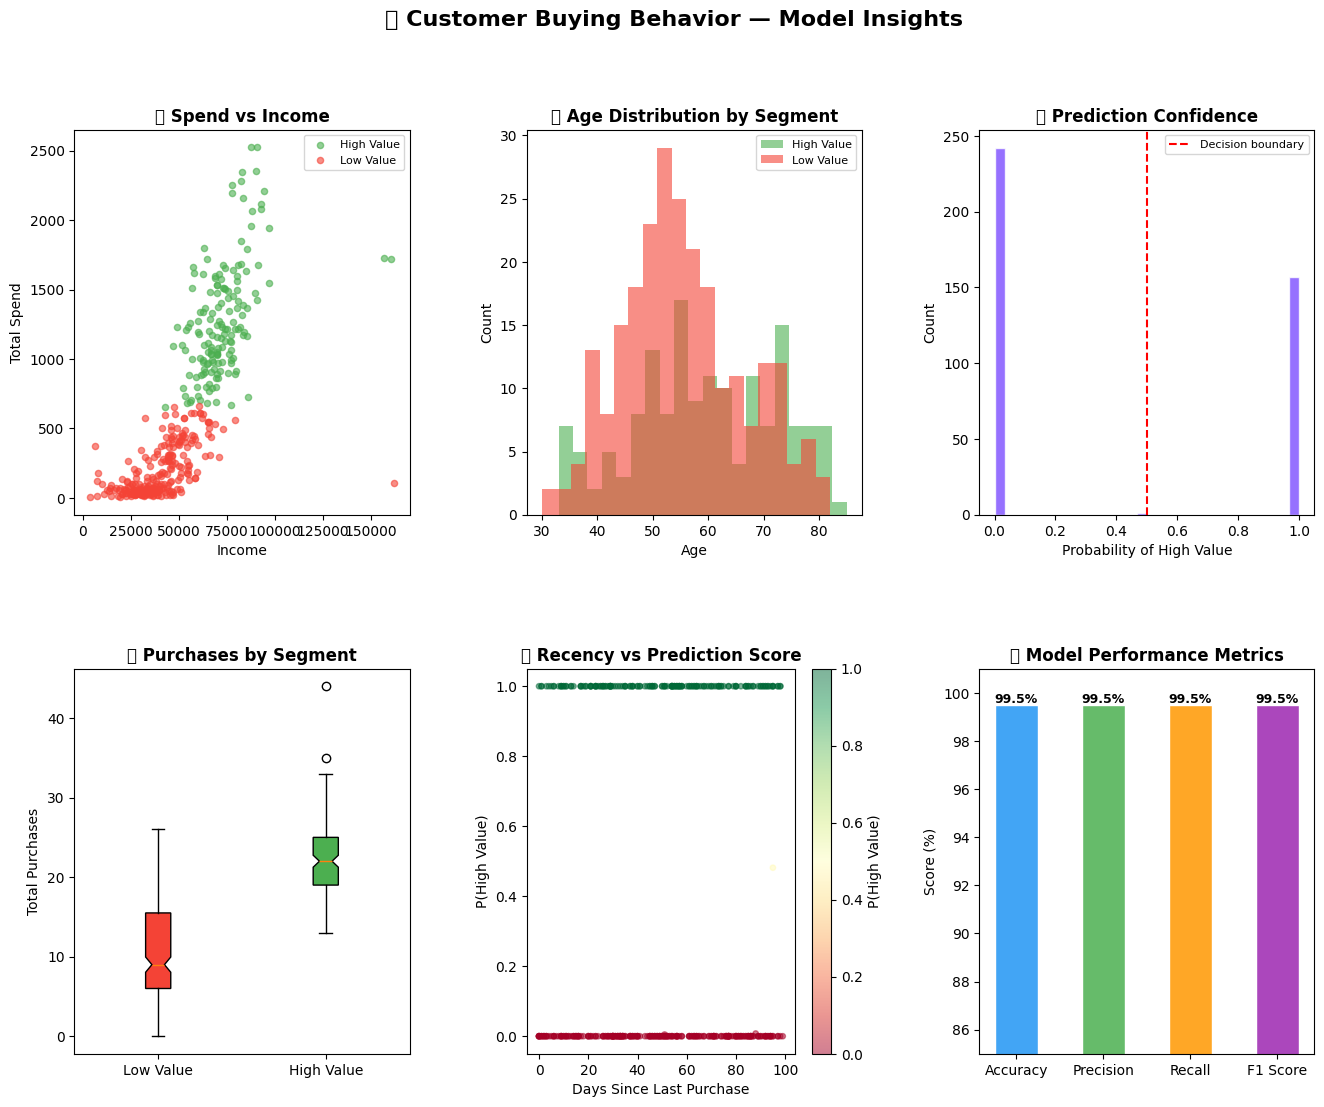

✅ Dashboard saved as customer_insights_dashboard.png


In [25]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd
import numpy as np

# Get predictions as pandas
pred_pdf = predictions.select(
    'label', 'prediction', 'probability',
    'Age', 'Income', 'TotalSpend', 'TotalPurchases', 'Recency'
).toPandas()

# Extract probability of being high value
pred_pdf['prob_high'] = pred_pdf['probability'].apply(lambda x: float(x[1]))
pred_pdf['Correct'] = pred_pdf['label'] == pred_pdf['prediction']
pred_pdf['Segment'] = pred_pdf['prediction'].map({0: 'Low Value', 1: 'High Value'})

fig = plt.figure(figsize=(16, 12))
fig.suptitle('🛒 Customer Buying Behavior — Model Insights',
             fontsize=16, fontweight='bold', y=0.98)

gs = gridspec.GridSpec(2, 3, figure=fig, hspace=0.4, wspace=0.35)

colors = {'High Value': '#4CAF50', 'Low Value': '#F44336'}
segment_colors = pred_pdf['Segment'].map(colors)

# --- Plot 1: TotalSpend vs Income ---
ax1 = fig.add_subplot(gs[0, 0])
for seg, grp in pred_pdf.groupby('Segment'):
    ax1.scatter(grp['Income'], grp['TotalSpend'],
                c=colors[seg], label=seg, alpha=0.6, s=20)
ax1.set_title('💰 Spend vs Income', fontweight='bold')
ax1.set_xlabel('Income')
ax1.set_ylabel('Total Spend')
ax1.legend(fontsize=8)

# --- Plot 2: Age distribution by segment ---
ax2 = fig.add_subplot(gs[0, 1])
for seg, grp in pred_pdf.groupby('Segment'):
    ax2.hist(grp['Age'], bins=20, alpha=0.6, label=seg, color=colors[seg])
ax2.set_title('👥 Age Distribution by Segment', fontweight='bold')
ax2.set_xlabel('Age')
ax2.set_ylabel('Count')
ax2.legend(fontsize=8)

# --- Plot 3: Prediction confidence distribution ---
ax3 = fig.add_subplot(gs[0, 2])
ax3.hist(pred_pdf['prob_high'], bins=30, color='#7C4DFF', alpha=0.8, edgecolor='white')
ax3.set_title('🎯 Prediction Confidence', fontweight='bold')
ax3.set_xlabel('Probability of High Value')
ax3.set_ylabel('Count')
ax3.axvline(x=0.5, color='red', linestyle='--', label='Decision boundary')
ax3.legend(fontsize=8)

# --- Plot 4: TotalPurchases by segment (boxplot) ---
ax4 = fig.add_subplot(gs[1, 0])
low  = pred_pdf[pred_pdf['Segment']=='Low Value']['TotalPurchases']
high = pred_pdf[pred_pdf['Segment']=='High Value']['TotalPurchases']
bp = ax4.boxplot([low, high], labels=['Low Value', 'High Value'],
                  patch_artist=True, notch=True)
bp['boxes'][0].set_facecolor('#F44336')
bp['boxes'][1].set_facecolor('#4CAF50')
ax4.set_title('🛍️ Purchases by Segment', fontweight='bold')
ax4.set_ylabel('Total Purchases')

# --- Plot 5: Recency vs Probability ---
ax5 = fig.add_subplot(gs[1, 1])
sc = ax5.scatter(pred_pdf['Recency'], pred_pdf['prob_high'],
                  c=pred_pdf['prob_high'], cmap='RdYlGn',
                  alpha=0.5, s=15)
plt.colorbar(sc, ax=ax5, label='P(High Value)')
ax5.set_title('📅 Recency vs Prediction Score', fontweight='bold')
ax5.set_xlabel('Days Since Last Purchase')
ax5.set_ylabel('P(High Value)')

# --- Plot 6: Model metrics bar chart ---
ax6 = fig.add_subplot(gs[1, 2])
metric_names = list(results.keys())
metric_vals  = list(results.values())
bar_colors = ['#42A5F5', '#66BB6A', '#FFA726', '#AB47BC']
bars = ax6.bar(metric_names, metric_vals, color=bar_colors,
                edgecolor='white', width=0.5)
ax6.set_ylim(85, 101)
ax6.set_title('📊 Model Performance Metrics', fontweight='bold')
ax6.set_ylabel('Score (%)')
for bar, val in zip(bars, metric_vals):
    ax6.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
             f'{val}%', ha='center', fontsize=9, fontweight='bold')

plt.savefig('customer_insights_dashboard.png', dpi=150, bbox_inches='tight')
plt.show()
print("✅ Dashboard saved as customer_insights_dashboard.png")

In [26]:
from google.colab import files
import zipfile, os

# Zip all outputs together
with zipfile.ZipFile('project_outputs.zip', 'w') as zf:
    for fname in ['confusion_matrix.png', 'feature_importance.png',
                  'final_neural_network.png', 'customer_insights_dashboard.png']:
        if os.path.exists(fname):
            zf.write(fname)
            print(f"  ✅ Added: {fname}")

files.download('project_outputs.zip')
print("\n📦 All outputs downloaded!")

  ✅ Added: confusion_matrix.png
  ✅ Added: feature_importance.png
  ✅ Added: final_neural_network.png
  ✅ Added: customer_insights_dashboard.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


📦 All outputs downloaded!
